In [1]:
import numpy as np
import pandas as pd
import h5py
import gc

import sklearn as sk

from sklearn.model_selection import ParameterGrid




import tensorflow as tf
from tensorflow.keras import mixed_precision
from tensorflow.keras.utils import GeneratorEnqueuer

import os
base_dir = '/media/tord/T7/Thesis_ssd/MasterThesis3'
os.chdir(base_dir)

from Classes.Modeling.DynamicModels import DynamicModels
from Classes.Modeling.StaticModels import StaticModels
from Classes.DataProcessing.LoadData import LoadData
from Classes.DataProcessing.HelperFunctions import HelperFunctions
from Classes.DataProcessing.DataHandler import DataHandler
from Classes.DataProcessing.RamLoader import RamLoader
from Classes.Modeling.GridSearchResultProcessor import GridSearchResultProcessor
from Classes.DataProcessing.ts_RamGenerator import data_generator



import sys


import random
import pprint
import re
import json


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: GeForce RTX 3090, compute capability 8.6


In [2]:
load_args = {
    'earth_explo_only' : True,
    'noise_earth_only' : False,
    'noise_not_noise' : False,
    'downsample' : True,
    'upsample' : True,
    'frac_diff' : 1,
    'seed' : 1,
    'subsample_size' : 0.05,
    'balance_non_train_set' : True,
    'use_true_test_set' : False,
    'even_balance' : True
}
loadData = LoadData(**load_args)
train_ds, val_ds, test_ds = loadData.get_datasets()
noise_ds = loadData.noise_ds
handler = DataHandler(loadData)
helper = HelperFunctions()

2 2
2 2
2 2


Mapping train redundancy: : [--------------------------------------->] 100 %

Mapping validation redundancy: : [--------------------------------------->] 100 %

Mapping test redundancy: : [--------------------------------------->] 100 %



Loaded explosion and earthquake dataset:
Evenly balanced among classes in the train set.
As well as non train sets.
Distribution (Label: (counts, proportion)) of
Train ds:
earthquake: (4089, 0.4972)  |  explosion: (4135, 0.5028)  
Val ds:
earthquake: (613, 0.4972)  |  explosion: (620, 0.5028)  
Test ds:
earthquake: (406, 0.4939)  |  explosion: (416, 0.5061)  


In [3]:
use_time_augmentor = True
use_noise_augmentor = True
scaler_name = "normalize"
filter_name = None
band_min = 2
band_max = 4
highpass_freq = 0.075

use_tensorboard = False
use_liveplots = False
use_custom_callback = False
use_early_stopping = False
start_from_scratch = False
use_reduced_lr = False
log_data = False

load_test_set = False


ramLoader = RamLoader(loadData, 
                      handler, 
                      use_time_augmentor = use_time_augmentor, 
                      use_noise_augmentor = use_noise_augmentor, 
                      scaler_name = scaler_name,
                      filter_name = filter_name, 
                      band_min = band_min,
                      band_max = band_max,
                      highpass_freq = highpass_freq, 
                      load_test_set = load_test_set)
x_train, y_train, x_val, y_val, noiseAug = ramLoader.load_to_ram()


Fitting noise set time augmentor: [--------------------------------------->] 100 %

Fit process completed after 40.335127115249634 seconds. Total datapoints fitted: 4239.
Average time per datapoint: 0.009515245839879602


Fitting train time augmentor: [--------------------------------------->] 100 %

Fit process completed after 19.34167194366455 seconds. Total datapoints fitted: 8224.
Average time per datapoint: 0.002351856997040923


Fitting validation time augmentor: [--------------------------------------->] 100 %

Fit process completed after 4.893874406814575 seconds. Total datapoints fitted: 1233.
Average time per datapoint: 0.003969078999849615


Stage one loading training set, timeAug: [--------------------------------------->] 100 %

Stage one loading validation set, timeAug: [--------------------------------------->] 100 %

Fit process of normalizer skipped as unecessary


Stage one loading noise set, timeAug: [--------------------------------------->] 100 %

Stage two loading

In [4]:
i = 0

[0]
[0] explosion


/home/tord/miniconda3/envs/thesis/lib/python3.8/site-packages/obspy/imaging/util.py:275: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/home/tord/miniconda3/envs/thesis/lib/python3.8/site-packages/obspy/imaging/waveform.py:820: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


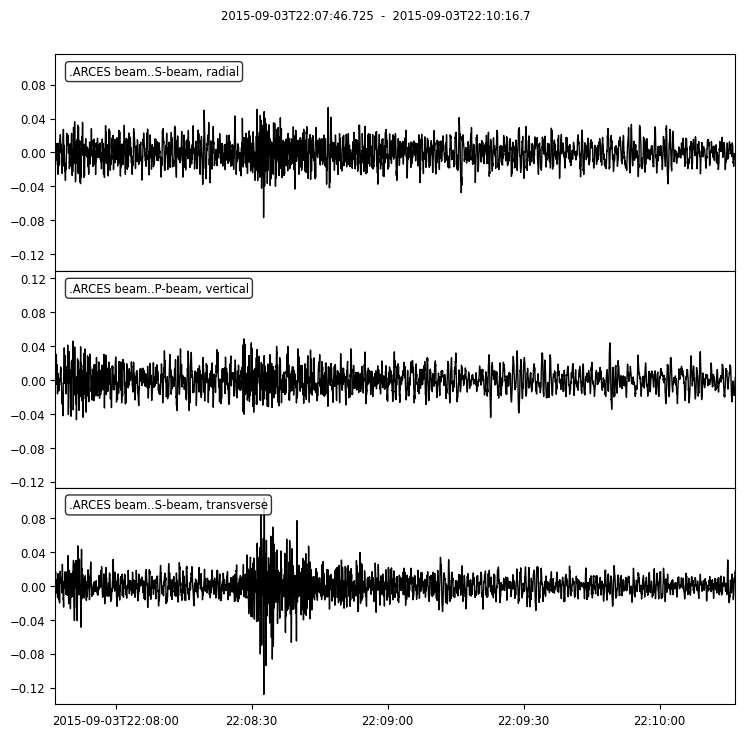

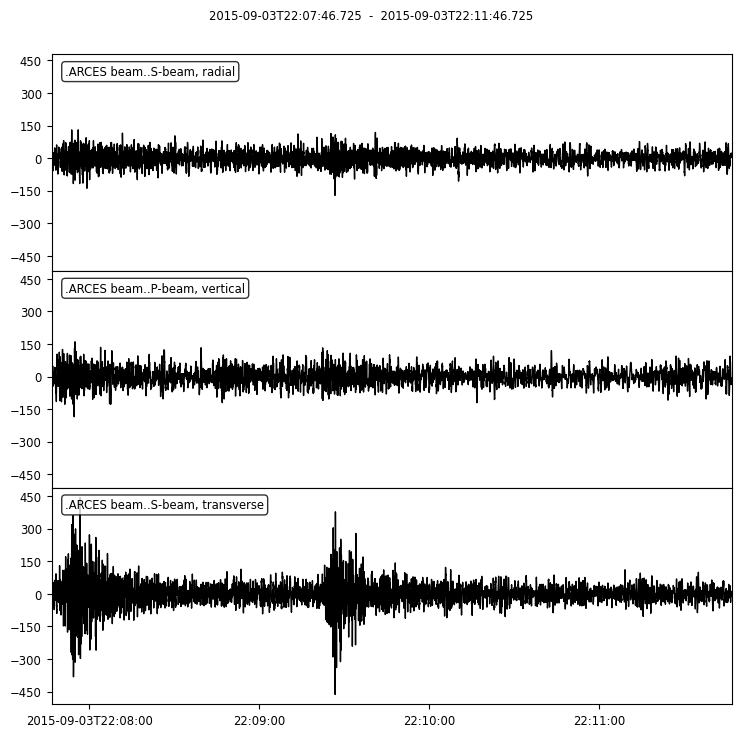

{   'analyst_pick_time': None,
    'az_to_arces': 35.051654808933506,
    'baz_to_arces': 219.56372671844701,
    'comments': [   {   'creation_info': {'author': 'general'},
                        'resource_id': 'smi:local/6b53686d-be47-4257-a2ac-99d9c0b2dd6c',
                        'text': 'FULLY AUTOMATIC, EVENT TYPE & LOCATION & '
                                'MAGNITUDE CHECKED (TOV)'},
                    {   'creation_info': {'author': 'mining area'},
                        'resource_id': 'smi:local/a3144fe2-8447-46c8-ab16-1b54e0e5a673',
                        'text': 'MINING AREA & TIME WINDOW: MALMBERGET  3KM'},
                    {   'creation_info': {'author': 'general'},
                        'resource_id': 'smi:local/9217bb4b-711e-49e6-85d9-fa196bda9a64',
                        'text': 'SWEDEN'}],
    'dist_to_arces': 329.68623328363367,
    'est_arrivaltime_arces': '2015-09-03 22:08:46.720000',
    'event_type': 'explosion',
    'event_type_certainty': 'known',


In [5]:
i +=1
sample_trace = x_train[i]
sample_label = y_train[i]
print(sample_label)
print(sample_label, train_ds[:,1][i])
original_trace, sample_info = handler.path_to_trace(train_ds[i][0])
helper.plot_event(sample_trace, sample_info)
helper.plot_event(original_trace, sample_info)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(sample_info)


In [6]:
train_ds[:,0][0]

'/media/tord/T7/Thesis_ssd/norsar_data_nov/explosions/2011-07-20T20.40.46.869000Z.h5'

In [7]:
earth_ex = '/media/tord/T7/Thesis_ssd/norsar_data_nov/explosions/1991-12-08T17.19.41.051000Z.h5'
original_trace, sample_info = handler.path_to_trace(earth_ex)
helper.plot_event(sample_trace, sample_info)
helper.plot_event(original_trace, sample_info)

OSError: Unable to open file (unable to open file: name = '/media/tord/T7/Thesis_ssd/norsar_data_nov/explosions/1991-12-08T17.19.41.051000Z.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## Sanity checking noise augement
When using scalers which are transformed independent of other points, some events with a lot of displacement will be scaled down, while noise samples will also be scaled down but proportionally larger than their original compared to other events. This is problematic for noise augmentation, as the normal 1/10th std will be more significant. This needs to be handled by the augmentor.

### Confirmation of theory below:

In [8]:
i = 0

explosion [0]


/home/tord/miniconda3/envs/thesis/lib/python3.8/site-packages/obspy/imaging/util.py:275: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/home/tord/miniconda3/envs/thesis/lib/python3.8/site-packages/obspy/imaging/waveform.py:820: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


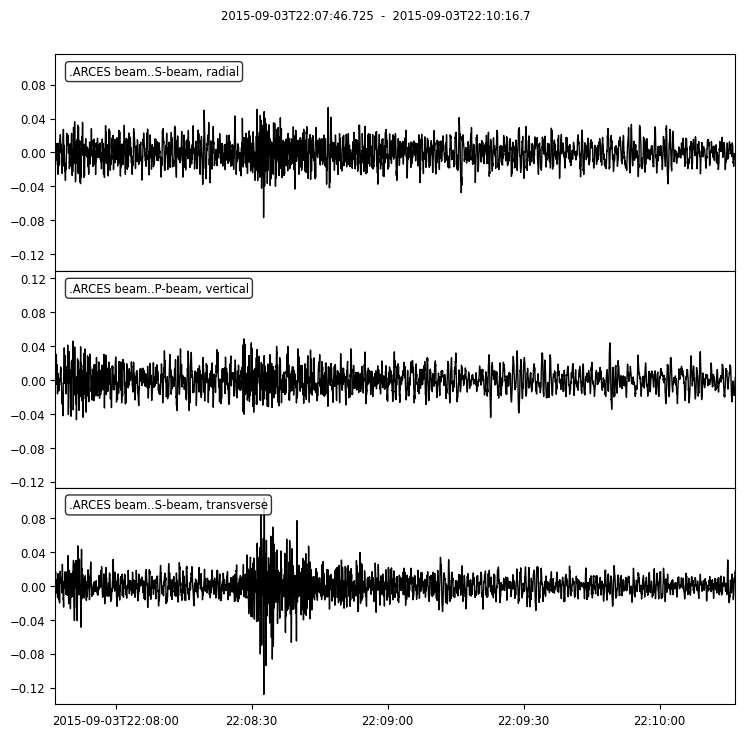

/home/tord/miniconda3/envs/thesis/lib/python3.8/site-packages/obspy/imaging/util.py:275: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/home/tord/miniconda3/envs/thesis/lib/python3.8/site-packages/obspy/imaging/waveform.py:820: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


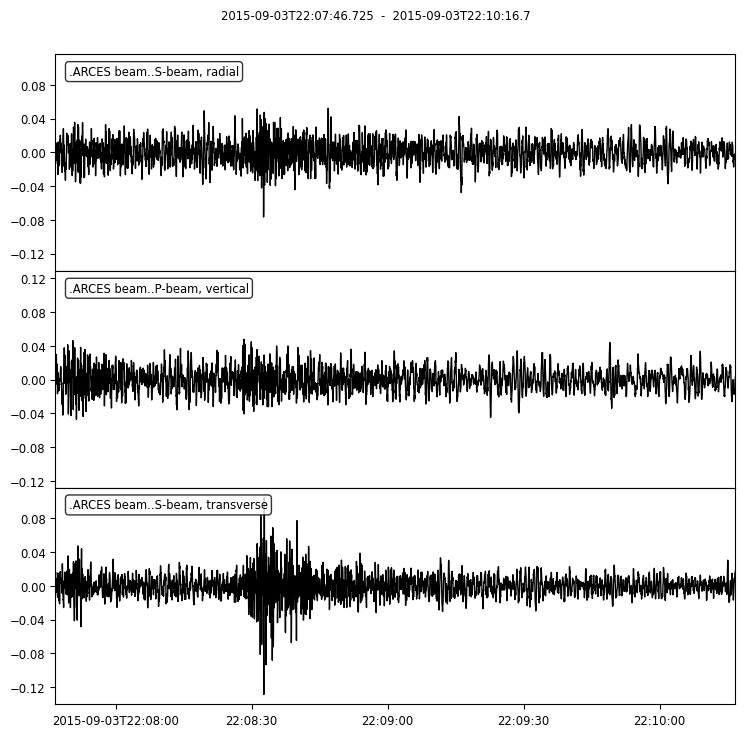

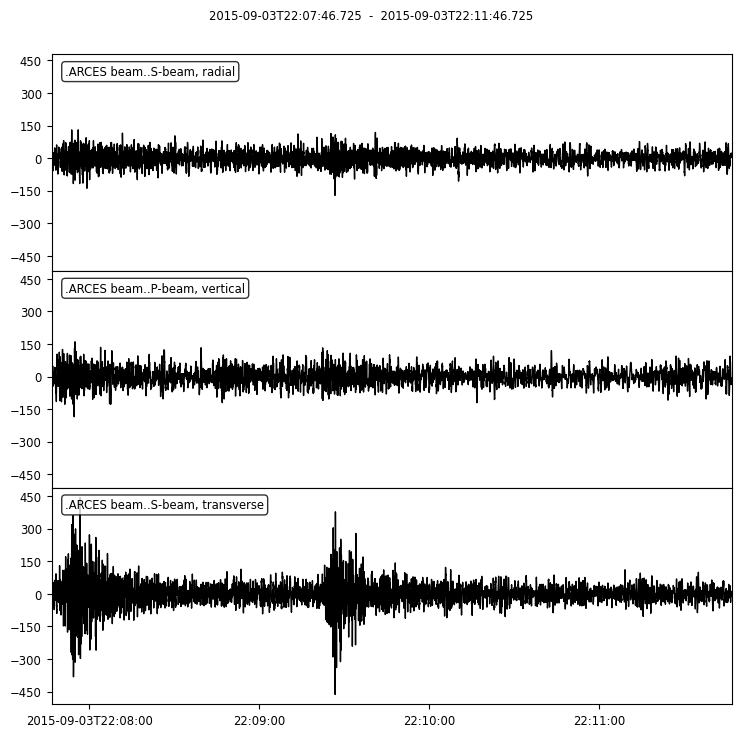

{   'analyst_pick_time': None,
    'az_to_arces': 35.051654808933506,
    'baz_to_arces': 219.56372671844701,
    'comments': [   {   'creation_info': {'author': 'general'},
                        'resource_id': 'smi:local/6b53686d-be47-4257-a2ac-99d9c0b2dd6c',
                        'text': 'FULLY AUTOMATIC, EVENT TYPE & LOCATION & '
                                'MAGNITUDE CHECKED (TOV)'},
                    {   'creation_info': {'author': 'mining area'},
                        'resource_id': 'smi:local/a3144fe2-8447-46c8-ab16-1b54e0e5a673',
                        'text': 'MINING AREA & TIME WINDOW: MALMBERGET  3KM'},
                    {   'creation_info': {'author': 'general'},
                        'resource_id': 'smi:local/9217bb4b-711e-49e6-85d9-fa196bda9a64',
                        'text': 'SWEDEN'}],
    'dist_to_arces': 329.68623328363367,
    'est_arrivaltime_arces': '2015-09-03 22:08:46.720000',
    'event_type': 'explosion',
    'event_type_certainty': 'known',


In [17]:
original_trace, sample_info = handler.path_to_trace(train_ds[i][0])
label_text = train_ds[i][1]
print(label_text, y_train[i])
pre_aug = x_train[i]
aug_sample = x_train[i]
aug_sample = noiseAug.batch_augment_noise(aug_sample, 0, noiseAug.noise_std/20)

helper.plot_event(pre_aug, sample_info)
helper.plot_event(aug_sample, sample_info)
helper.plot_event(original_trace, sample_info)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(sample_info)
i-=1